In [2]:
from server.models import *

In [3]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
import shapefile

In [4]:
reader = shapefile.Reader('./files/lots.shp')

In [5]:
fields = reader.fields[1:]

In [6]:
field_names = [field[0] for field in fields]


In [7]:
records = []

In [8]:
for sr in reader.shapeRecords():
    records.append(
        dict(
            type="Feature",
            geometry=sr.shape.__geo_interface__,
            properties=dict(zip(field_names, sr.record))
        )
    )

lots = geopandas.GeoDataFrame.from_features(records)
lots.head()

EntityHand Layer Linetype               SubClasses Text  \
0         16  SDWK           AcDbEntity:AcDbPolyline        
1         19  BNDY           AcDbEntity:AcDbPolyline        
2         1B  LOTS           AcDbEntity:AcDbPolyline        
3         1D  ROWS           AcDbEntity:AcDbPolyline        
4         1F  BNDY           AcDbEntity:AcDbPolyline        

                                            geometry  
0  LINESTRING (2254319.462572254 6954126.93353005...  
1  LINESTRING (2256318.309081795 6953716.04603124...  
2  LINESTRING (2255241.207905239 6955425.21581477...  
3  LINESTRING (2256316.732237552 6953757.60504981...  
4  LINESTRING (2257573.72271728 6953384.517855395...

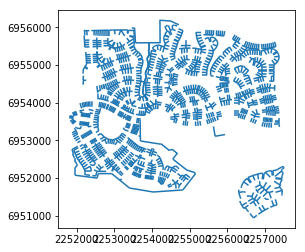

In [20]:
lots[lots['Layer'] == 'LOTS'].plot()

In [17]:
from IPython.core.display import HTML
display(HTML(lots[lots['Layer'] == 'LOTS'].to_html()))

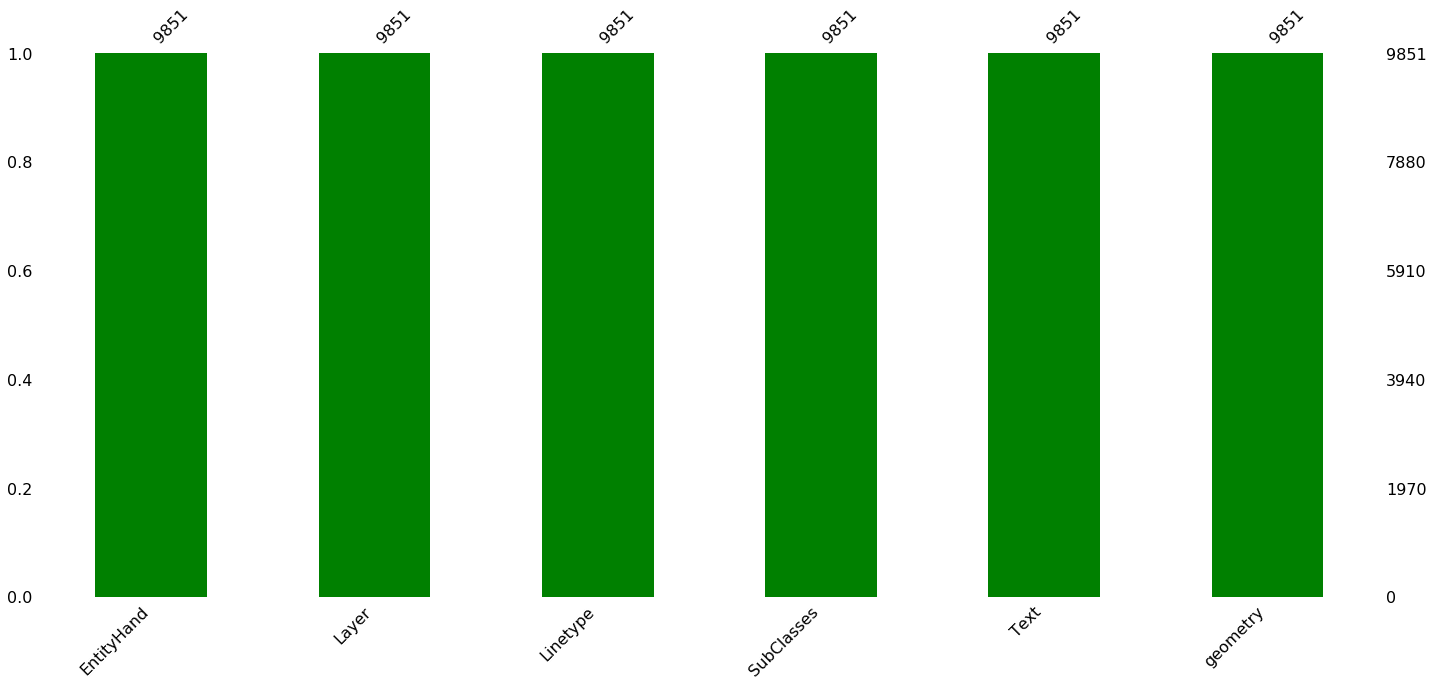

In [11]:
msn.bar(lots, color='green')

In [12]:
    from osgeo import ogr
    driver = ogr.GetDriverByName('ESRI Shapefile')
    shape = driver.Open('files/lots.shp')
    layer= shape.GetLayer('LOTS')
    # the crs
    crs = layer.GetSpatialRef()

In [13]:
print crs

None


In [14]:
print layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x12d364390> >


In [15]:
from pyproj import Proj, transform
inProj = Proj(init='epsg:6583')
outProj = Proj(init='epsg:4326')
for coords in records[0]['geometry']['coordinates']:
    x1,y1 = coords
    x2,y2 = transform(inProj,outProj,x1,y1)
    print(x2,y2)

(-64.99568405961435, 70.31767905967763)
(-64.9956841661707, 70.31767921193854)
(-64.99568423353129, 70.31767930836644)
(-64.99568423353129, 70.31767930836644)
(-64.99527448176015, 70.31800923175955)
(-64.99490577957864, 70.31834461004702)
(-64.99488469231157, 70.31834189240966)
(-64.99485969721046, 70.31833815592638)
(-64.99482320693909, 70.31833304523111)
(-64.99481346866351, 70.31833168132243)
(-64.99481346866351, 70.31833168132243)
(-64.9955880665477, 70.31766478873477)
(-64.99568405961435, 70.31767905967763)


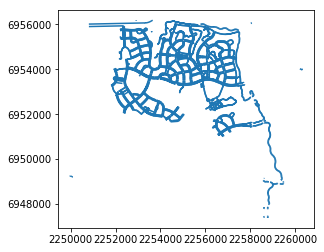

In [21]:
lots[lots['Layer'] == 'SDWK'].plot()